In [32]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('mental_health_workplace_survey.csv')
df.head()

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


In [33]:
X = df.drop(columns=['BurnoutRisk'])
y = df['BurnoutRisk']

X = pd.get_dummies(X, drop_first=True)





In [34]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:

lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)


In [36]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_lda, y_train)
y_pred = model.predict(X_test_lda)


In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Logistic Regression Trained with LDA")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(cm)


Logistic Regression Trained with LDA
Accuracy: 0.9833
Confusion Matrix:
[[392   7]
 [  3 198]]


In [38]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
confusion=confusion_matrix(y_test,y_pred)

print("Logistic Regression Trained without LDA")
print(f"Accuracy of model is:{accuracy}")
print(f"Confusion Matrix:{confusion}")

Logistic Regression Trained without LDA
Accuracy of model is:0.9916666666666667
Confusion Matrix:[[395   4]
 [  1 200]]


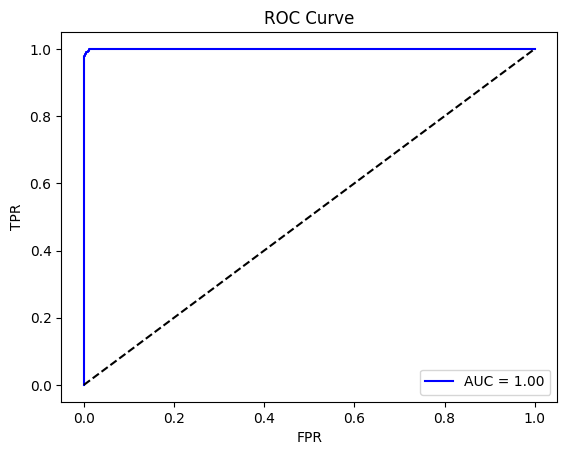

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()